In [22]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

seed = 55
data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

print(data)

          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]


In [28]:
# preprocess data
import re
import string

features = data.iloc[:, 2].values

for i in range(len(features)):
  features[i] = features[i].replace("@user", "")
  features[i] = features[i].translate(str.maketrans('', '', string.punctuation))
  features[i] = ''.join(i for i in features[i] if not i.isdigit())
  features[i] = re.sub(r'\s+', ' ', features[i], flags=re.I)
  features[i] = features[i].lower()
  features[i] = data.iloc[:, 2].values[i]

In [29]:
print(data.head(25))

    id  label                                              tweet
0    1      0   when a father is dysfunctional and is so self...
1    2      0   thanks for lyft credit i cant use cause they ...
2    3      0                                bihday your majesty
3    4      0  model i love u take with u all the time in urð...
4    5      0                  factsguide society now motivation
5    6      0   huge fan fare and big talking before they lea...
6    7      0                          camping tomorrow dannyâ¦
7    8      0  the next school year is the year for examsð¯...
8    9      0  we won love the land allin cavs champions clev...
9   10      0                         welcome here im its so gr 
10  11      0   â ireland consumer price index mom climbed ...
11  12      0  we are so selfish orlando standwithorlando pul...
12  13      0        i get to see my daddy today days gettingfed
13  14      1   cnn calls michigan middle school build the wa...
14  15      1  no comment

In [30]:
from sklearn.model_selection import train_test_split

features = data.iloc[:, 2].values
labels = data.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

print(X_train, len(X_train))
print(X_test)
print(y_train, len(y_train))
print(y_test)


['how could you all ever lose your faith in me pain mistrust relationship outcast twitter life love friendship cruel'
 'my name often times auto corrects to leukemia '
 'suddenly staing to feel real now im finished both jobs ð\x9f\x98» ' ...
 'another melbourne snap this guy played the most beautiful sounding instrument streetphotography '
 ' thanks for the retweet '
 ' kicks off today check out the full list of guests were to see this weekend '] 25569
['i am thankful for sunshinethankful positive '
 'up latei am tired but i cant sleep my eyes are swollen from crying my brothers and sisters ð\x9f\x91\xadð\x9f\x91¬ð\x9f\x8c\x88ð\x9f\x91¼ð\x9f\x99\x8fð\x9f\x98¢ prayfoheworld pulse help'
 'series finale of house of lies tonight ' ...
 ' pls norfolkhour the eaaa norfolk polo festival stas tomorrow '
 'every lactation consultant ive ever met has been a woman hello '
 ' so easy subscribe and feel level lifestyle vlogger rotterdam foodies fun ']
[0 0 0 ... 0 0 0] 25569
[0 0 0 ... 0 1 0]


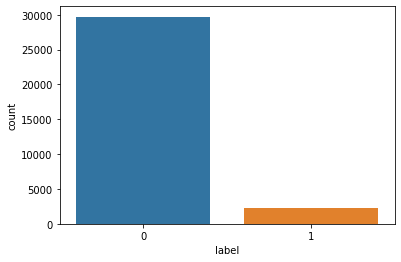

In [31]:
import seaborn as sns

sns.countplot(x='label', data=data)

In [32]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


vocab_size = len(tokenizer.word_index) + 1

maxlen = 255

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [12]:
print(X_train, len(X_train))
print(X_test, len(X_test))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 25569
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 6393


In [33]:
embedding_layer = Embedding(vocab_size, 100, input_length=maxlen)
model = Sequential()
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 255, 100)          3944200   
                                                                 
 flatten_2 (Flatten)         (None, 25500)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25501     
                                                                 
Total params: 3,969,701
Trainable params: 3,969,701
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
160/160 [==============================] - 12s 74ms/step - loss: 0.2378 - acc: 0.9249 - val_loss: 0.1713 - val_acc: 0.9392
Epoch 2/20
160/160 [==============================] - 12s 73ms/step - loss: 0.1190 - acc: 0.9550 - val_loss: 0.1309 - val_acc: 0.9517
Epoch 3/20
160/160 [==============================] - 11s 71ms/step - loss: 0.0742 - acc: 0.9730 - val_loss: 0.1257 - val_acc: 0.9560
Epoch 4/20
160/160 [==============================] - 11s 70ms/step - loss: 0.0509 - acc: 0.9841 - val_loss: 0.1264 - val_acc: 0.9583
Epoch 5/20
160/160 [==============================] - 11s 71ms/step - loss: 0.0348 - acc: 0.9895 - val_loss: 0.1314 - val_acc: 0.9593
Epoch 6/20
160/160 [==============================] - 12s 75ms/step - loss: 0.0240 - acc: 0.9942 - val_loss: 0.1386 - val_acc: 0.9582
Epoch 7/20
160/160 [==============================] - 12s 73ms/step - loss: 0.0172 - acc: 0.9966 - val_loss: 0.1445 - val_acc: 0.9564
Epoch 8/20
160/160 [==============================] - 11s 70ms

In [35]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(loss)


print('Accuracy: %f' % (accuracy*100))

0.22978468239307404
Accuracy: 95.510715


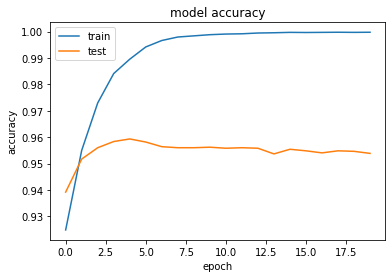

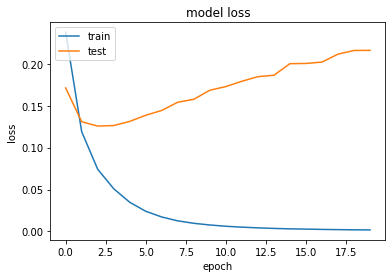

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [37]:
print(features[30])
print(features[25])
print(features[55])

i have never had a chance to vote for a presidential candidate i was excited about and this cycle looks to be no different 
beautiful sign by vendor for upsideofflorida shopalyssas love 
a scourge on those playing baroque pieces on piano beyond belief 


In [38]:
instance = tokenizer.texts_to_sequences(sentence)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[8.421815e-05]], dtype=float32)